<a href="https://colab.research.google.com/github/pucrs-ai-cs/practical-notebooks/blob/master/adversarial-search/adversarial_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Artificial Intelligence</h1>
<h3>Adversarial Search Coursework</h3>   
<h4>Prof. Felipe Meneguzzi</h4>
<h5>Computer Science (4646A-4)</h5></center>


The necessary files to run the code in this exercise is available in Google Drive in the following url.

We can download it using the gdown package, and save it as 'data.tar.gz' in the working directory.

<b>IMPORTANT: to edit open in playground mode!</b>

In [0]:
import gdown

target_url = 'https://drive.google.com/uc?id=14L-Ta2ukdXKwjwFzpwbuqNJdbGxTLWPd'

gdown.download(target_url,'data.tar.gz',quiet=False)


Now, we extract files from the tarball:

In [0]:
import os

#set data location
file_path = './data.tar.gz'

#extract tarball
if os.path.exists(file_path):
  import tarfile
  tar = tarfile.open(file_path, "r:gz") 
  tar.extractall()
  tar.close()

Finally, we import the dependencies:

In [0]:
open('__init__.py')
import player
import player_alphabeta
import player_random
import player_alphabeta
open('common.py')
import common
open('tictactoe.py')
import tictactoe
open('util.py')
import util

<h2>1 TicTacToe</h2>

<p>TicTacToe¹, is an ancient game, that, if <a href="https://en.wikipedia.org/wiki/Tic-tac-toe">Wikipedia</a> is to be believed, originates in Ancient Egypt, and was played in Ancient Rome. More importantly, it is simple enough that one can easily generate the entire game tree within a computer, which lends itself to implementation without complex optimizations to the basic MiniMax algorithm. An example of a set of legal moves is shown below in Figure 1.</p>

<p>In this assignment, you will calculate the next move for the computer player using the <b>MiniMax algorithm</b>. Since the command line allows you to select which player moves first (i.e. the human or computer), your code must be able to handle the scenario where the human moves first and the scenario where the human moves second. You can also specify that two computer players (i.e. either Random, MiniMax or AlphaBeta) will play against each other, so your code must be generic enough to handle being the X player or the O player.</p>
<p>The game of tic-tac-toe is small enough that we can generate the entire game tree while doing the MiniMax search. As a result, you do not need to create an evaluation function for non-terminal nodes (i.e. the H-MiniMax algorithm). What you will need to create is a utility function which returns the utility at terminal states. You will also need to create a successor function. This function takes the current state of the game and generates all the successors that can be reached within one move of the current state. Both the utility function and the successor function need to be written. You get to decide what these functions should look like. Once these two functions are in place, you can begin coding the actual MiniMax algorithm.</p>

Observation:<br>
¹A.k.a. Jogo da Velha, interestingly in Mozambique, they do not use the same name.

In [0]:
from IPython.display import Image

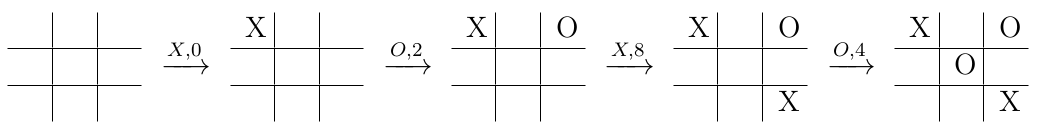

In [5]:
Image('img/figure1.png', width=700)

<center>Figure 1: A sequence of valid moves for a tic-tac-toe problem</center>

<h2>2 Overview</h2>
<p>For this not-graded assignment, you will be implementing the MiniMax adversarial search algorithm to compute the optimal move for either one of the players in the game. In this assignment you can also implement the more advanced Alpha-Beta search algorithm to speed up the search by cutting unnecessary branches of the game tree. For those who have never seen the game, the final state of the game occurs when either player has managed to align three of his/her symbols vertically, horizontally or in diagonal, or when there is no more blank squares on the board, as shown in Figure 2.</p>

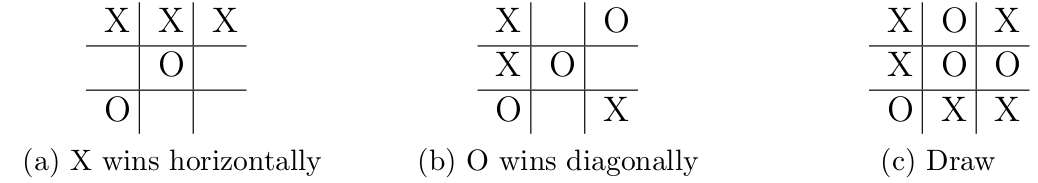

In [6]:
Image('img/figure2.png', width=700)

<center>Figure 2: Endgame examples</center>

<h2>3 Implementation</h2>
<p>At the bare minimum, you are required to implement only the API in Listing 1, below. However, it is highly recommended that you create additional methods to represent elements of the algorithm, such as the utility function and the successor function that generates the moves available to each player. We note that the API shown below is deliberately simplified to give students the maximum freedom to develop their own internal APIs (and minimize coincidental similarities in implementation), and that well developed code is a component of the final mark. By way of comparison, the instructor’s implementation has 3 additional methods, and uses the method of Listing 1 to invoke the minimax function. This interface <b>must be implemented</b> for every player you may add. </p>  

In [0]:
# ==========================================
# Listing 1: player_minimax.py
# ==========================================


from player import Player
import util

# ==========================================
# Player Minimax
# ==========================================

class MinimaxPlayer(Player):
    # −−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    # Initialize
    # −−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    
    def init(self, symbol):
        # symbol is a string ’X’ or ’O’
        super(MinimaxPlayer, self).init(symbol)

    # −−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    # Get next move
    # −−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
    def get_next_move(self, board):
        # board = [0,0,0, 0,0,0, 0,0,0]
        # TODO return movement as integer (0 to 8) or None
        return None

<h2>4 Code-Specific Advice</h2>

<ul>
    <li>In file <b>util.py</b>, you can check many conditions of the endgame, including whether a particular player has won;</li>
    <li>We already helped you figure out part of the problem of how to make your <b>MinimaxPlayer</b> be generic by providing the <b>symbol</b> which you can use to check whether the current player has won in the current <b>board</b>;</li>
    <li>All classes and methods which you must complete yourself are marked with the <b>TODO</b> keyword (search for that using your favorite editor).</li>
<ul>       

<h2>5 Miscellaneous Advice</h2>
<p>Here are some lessons we learned in creating our own solution and writing papers/reports:</p>

<ul>
    <li>It took the instructor approximately 30 minutes to code and debug the solution for this problem from scratch based on the pseudocode at AIMA, plan your time accordingly;</li>
    <li>The Python standard library has a number of classes that greatly facilitate developing the data structures required for an efficient implementation;</li>
    <li>The instructor’s implementation takes about 5 <b>milliseconds</b> to play a single game using the non-optimized minimax algorithm and less than one millisecond to do so using alpha-beta pruning;</li>
    <li>Do not forget about Python’s profiler: <b>python -m cProfile tictactoe.py</b>;</li>
</ul>

<h2>6 Requeriments</h2>

In [8]:
pip install timeout-decorator

<h2>7 Testing</h2>

You can automatically test your own code with the <b>test_tictactoe.py</b> bellow. <br>

In [12]:
import unittest
from common import *
from util import *
from tictactoe import *
from player import *
from player_alphabeta import *
from player_human import *
from player_random import *

try:
    from timeout_decorator import timeout
except:
    print ("""Oops! It looks like you don\'t have timeout-decorator installed. Please do so using the following command:
        pip install timeout-decorator""")
    sys.exit(0)


PLAYS = 10

RANDOM = "random"
MINIMAX = "minimax"
ALPHABETA = "alphabeta"

PLAYERS = { str(c): c for c in vars()["Player"].__subclasses__() }

def percentage(wins, games):
    return float(wins) / float(games) * 100

# ==========================================
# Test TicTacToe
# ==========================================

class Test_TicTacToe(unittest.TestCase):

    # ------------------------------------------
    # Setup
    # ------------------------------------------

    @classmethod
    def setUpClass(cls):
        cls.minimax_vs_random_results = None
        cls.random_vs_minimax_results = None
        cls.minimax_vs_minimax_results = None
        cls.alphabeta_vs_random_results = None
        cls.random_vs_alphabeta_results = None

    @classmethod
    def tearDownClass(cls):

        print("\n")

        if cls.minimax_vs_random_results != None:
            wins, losses, draws, errors = cls.minimax_vs_random_results
            print("Minimax VS Random results:")
            print("  Wins: %f (%f%%)" % ( wins, percentage(wins, PLAYS) ))
            print("  Losses: %f (%f%%)" % ( losses, percentage(losses, PLAYS) ))
            print("  Draws: %f (%f%%)" % ( draws, percentage(draws, PLAYS) ))


        if cls.random_vs_minimax_results != None:
            wins, losses, draws, errors = cls.random_vs_minimax_results
            print("Random VS Minimax results:")
            print("  Wins: %f (%f%%)" % ( wins, percentage(wins, PLAYS) ))
            print("  Losses: %f (%f%%)" % ( losses, percentage(losses, PLAYS) ))
            print("  Draws: %f (%f%%)" % ( draws, percentage(draws, PLAYS) ))


        if cls.minimax_vs_minimax_results != None:
            wins, losses, draws, errors = cls.minimax_vs_minimax_results
            print("Minimax VS Minimax results:")
            print("  Wins: %f (%f%%)" % ( wins, percentage(wins, PLAYS) ))
            print("  Losses: %f (%f%%)" % ( losses, percentage(losses, PLAYS) ))
            print("  Draws: %f (%f%%)" % ( draws, percentage(draws, PLAYS) ))


        if cls.alphabeta_vs_random_results != None:
            wins, losses, draws, errors = cls.alphabeta_vs_random_results
            print("Alphabeta VS Random results:")
            print("  Wins: %f (%f%%)" % ( wins, percentage(wins, PLAYS) ))
            print("  Losses: %f (%f%%)" % ( losses, percentage(losses, PLAYS) ))
            print("  Draws: %f (%f%%)" % ( draws, percentage(draws, PLAYS) ))


        if cls.random_vs_alphabeta_results != None:
            wins, losses, draws, errors = cls.random_vs_alphabeta_results
            print("Random VS Alphabeta results:")
            print("  Wins: %f (%f%%)" % ( wins, percentage(wins, PLAYS) ))
            print("  Losses: %f (%f%%)" % ( losses, percentage(losses, PLAYS) ))
            print("  Draws: %f (%f%%)" % ( draws, percentage(draws, PLAYS) ))


    # ------------------------------------------
    # Create game
    # ------------------------------------------

    def versus(self, playerO_name, playerX_name, rounds, time_per_round=0):

        wins = 0
        losses = 0
        draws = 0
        errors = 0

        @timelimit(time_per_round)
        def round_exec(playerO_name, playerX_name):
            playerO = PLAYERS[playerO_name](O)
            playerX = PLAYERS[playerX_name](X)
            game = TicTacToe(playerO, playerX, False)
            while game.winner == None:
                game.update()
            return DRAW if game.winner == DRAW else game.winner.symbol

        for round in range(rounds):
            try:
                winner = round_exec(playerO_name, playerX_name)
                if winner == O:
                    wins += 1
                elif winner == X:
                    losses += 1
                elif winner == DRAW:
                    draws += 1
            except Exception as e:
                errors += 1
        return (wins, losses, draws, errors)

    # ------------------------------------------
    # Minimax Vs Random
    # ------------------------------------------

    def test_minimax_vs_random(self):
        wins, losses, draws, errors = self.versus(MINIMAX, RANDOM, PLAYS)
        self.__class__.minimax_vs_random_results = (wins, losses, draws, errors)
        #self.assertGreaterEqual(percentage(wins, PLAYS), 0.5) 
        #self.assertEqual(errors, 0)
        var1 = percentage(wins, PLAYS)
        var2 = 0.5
        var3 = errors
        var4 = 0
        if var1 < var2 and var3 != var4:
            print ("test_minimax_vs_random failed! percentage(wins, PLAYS) is not greater than or equal to 0.5")
     
        
    # ------------------------------------------
    # Random Vs Minimax
    # ------------------------------------------

    def test_random_vs_minimax(self):
        wins, losses, draws, errors = self.versus(RANDOM, MINIMAX, PLAYS)
        self.__class__.random_vs_minimax_results = (wins, losses, draws, errors)
        #self.assertGreaterEqual(percentage(losses, PLAYS), 0.2)
        #self.assertEqual(errors, 0)
        var1 = percentage(losses, PLAYS)
        var2 = 0.2
        var3 = errors
        var4 = 0
        if var1 < var2 and var3 != var4:
            print ("test_random_vs_minimax failed! percentage(losses, PLAYS) is not greater than or equal to 0.2")
  

    # ------------------------------------------
    # Minimax Vs Minimax
    # ------------------------------------------

    def test_minimax_vs_minimax(self):
        wins, losses, draws, errors = self.versus(MINIMAX, MINIMAX, PLAYS)
        self.__class__.minimax_vs_minimax_results = (wins, losses, draws, errors)
        #self.assertGreaterEqual(percentage(draws, PLAYS), 1.0)
        #self.assertEqual(errors, 0)
        var1 = percentage(draws, PLAYS)
        var2 = 1.0
        var3 = errors
        var4 = 0
        if var1 < var2 and var3 != var4:
            print ("test_minimax_vs_minimax failed! percentage(draws, PLAYS) is not greater than or equal to 1.0")
        

    # ------------------------------------------
    # Alphabeta Vs Random
    # ------------------------------------------

    def test_alphabeta_vs_random(self):
        wins, losses, draws, errors = self.versus(ALPHABETA, RANDOM, PLAYS, time_per_round=0.4)
        self.__class__.alphabeta_vs_random_results = (wins, losses, draws, errors)
        #self.assertGreaterEqual(percentage(wins, PLAYS), 0.9)
        #self.assertEqual(errors, 0)
        var1 = percentage(wins, PLAYS)
        var2 = 0.9
        var3 = errors
        var4 = 0
        if var1 < var2 and var3 != var4:
            print ("test_alphabeta_vs_random failed! percentage(wins, PLAYS) is not greater than or equal to 0.9")
        

    # ------------------------------------------
    # Random Vs Alphabeta
    # ------------------------------------------

    def test_random_vs_alphabeta(self):
        wins, losses, draws, errors = self.versus(RANDOM, ALPHABETA, PLAYS, time_per_round=0.4)
        self.__class__.random_vs_alphabeta_results = (wins, losses, draws, errors)
        #self.assertGreaterEqual(percentage(losses, PLAYS), 0.9)
        #self.assertEqual(errors, 0)
        var1 = percentage(losses, PLAYS)
        var2 = 0.9
        var3 = errors
        var4 = 0
        if var1 < var2 and var3 != var4:
            print ("test_random_vs_alphabeta failed! percentage(losses, PLAYS) is not greater than or equal to 0.9")
        
        

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    #unittest.main(verbosity=False)

...

test_minimax_vs_minimax failed! percentage(draws, PLAYS) is not greater than or equal to 1.0
test_minimax_vs_random failed! percentage(wins, PLAYS) is not greater than or equal to 0.5


..

test_random_vs_minimax failed! percentage(losses, PLAYS) is not greater than or equal to 0.2


Minimax VS Random results:
  Wins: 0.000000 (0.000000%)
  Losses: 0.000000 (0.000000%)
  Draws: 0.000000 (0.000000%)
Random VS Minimax results:
  Wins: 0.000000 (0.000000%)
  Losses: 0.000000 (0.000000%)
  Draws: 0.000000 (0.000000%)
Minimax VS Minimax results:
  Wins: 0.000000 (0.000000%)
  Losses: 0.000000 (0.000000%)
  Draws: 0.000000 (0.000000%)
Alphabeta VS Random results:
  Wins: 10.000000 (100.000000%)
  Losses: 0.000000 (0.000000%)
  Draws: 0.000000 (0.000000%)
Random VS Alphabeta results:
  Wins: 0.000000 (0.000000%)
  Losses: 10.000000 (100.000000%)
  Draws: 0.000000 (0.000000%)



----------------------------------------------------------------------
Ran 5 tests in 2.180s

OK
